## Lista 3

### Zadanie 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def es_mu_plus_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, objective_function, interval=(0, 1)):
    tau = 1 / np.sqrt(2 * dim)
    tau_prime = 1 / np.sqrt(2 * np.sqrt(dim))

    parents_x = np.random.uniform(interval[0], interval[1], (mu, dim))
    parents_sigma = np.full((mu, dim), sigma_init)
    history = []

    for generation in range(num_generations):
        offspring_x = []
        offspring_sigma = []
        for _ in range(lambd):
            idx = np.random.randint(0, mu)
            parent_x = parents_x[idx]
            parent_sigma = parents_sigma[idx]
            
            offspring_sigma_i = parent_sigma * np.exp(
                tau_prime * np.random.randn() + tau * np.random.randn(dim)
            )
            
            offspring_x_i = parent_x + offspring_sigma_i * np.random.randn(dim)
            
            offspring_x.append(offspring_x_i)
            offspring_sigma.append(offspring_sigma_i)
        
        offspring_x = np.array(offspring_x)
        offspring_sigma = np.array(offspring_sigma)

        combined_x = np.vstack((parents_x, offspring_x))
        combined_sigma = np.vstack((parents_sigma, offspring_sigma))
        
        fitness = np.apply_along_axis(objective_function, 1, combined_x)

        best_indices = np.argsort(fitness)[:mu]
        parents_x = combined_x[best_indices]
        parents_sigma = combined_sigma[best_indices]

        history.append(fitness[best_indices[0]])
        best_fitness = fitness[best_indices[0]]
        #print(f"Generation {generation + 1}: Best fitness = {best_fitness}, {parents_x[0]}")
    #print(parents_x[0])
    print(history[-1])
    return (history, f'ES(μ + λ) {objective_function.__name__}, mu: {mu}, lambda: {lambd}, dim: {dim}, sigma_init={sigma_init}')

In [19]:
def es_mu_comma_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, objective_function, interval=(0, 1)):
    tau = 1 / np.sqrt(2 * dim)
    tau_prime = 1 / np.sqrt(2 * np.sqrt(dim))

    parents_x = np.random.uniform(interval[0], interval[1], (mu, dim))
    parents_sigma = np.full((mu, dim), sigma_init)
    history = []

    for generation in range(num_generations):
        offspring_x = []
        offspring_sigma = []
        for _ in range(lambd):
            idx = np.random.randint(0, mu)
            parent_x = parents_x[idx]
            parent_sigma = parents_sigma[idx]
            
            offspring_sigma_i = parent_sigma * np.exp(
                tau_prime * np.random.randn() + tau * np.random.randn(dim)
            )
            
            offspring_x_i = parent_x + offspring_sigma_i * np.random.randn(dim)
            
            offspring_x.append(offspring_x_i)
            offspring_sigma.append(offspring_sigma_i)
        
        offspring_x = np.array(offspring_x)
        offspring_sigma = np.array(offspring_sigma)
        
        fitness = np.apply_along_axis(objective_function, 1, offspring_x)
        
        best_indices = np.argsort(fitness)[:mu]
        parents_x = offspring_x[best_indices]
        parents_sigma = offspring_sigma[best_indices]

        history.append(fitness[best_indices[0]])
        # best_fitness = fitness[best_indices[0]]
        # print(f"Generation {generation + 1}: Best fitness = {best_fitness}")
    #print(parents_x[0])
    print(history[-1])
    return (history, f'ES(μ, λ) {objective_function.__name__}, mu: {mu}, lambda: {lambd}, dim: {dim}, sigma_init={sigma_init}')

In [11]:
def sphere(x):
    return np.sum(x**2)


In [4]:
def plot_fitness_history(*fitness_histories):
    plt.figure(figsize=(14, 10))
    for (fitness_history, label) in fitness_histories:
        plt.plot(range(1, len(fitness_history) + 1), fitness_history, label=label)
    plt.title("Objective function change", fontsize=16)
    plt.xlabel("Iterations", fontsize=14)
    plt.ylabel("Best fitness", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.legend()
    plt.show()

Different sigmas


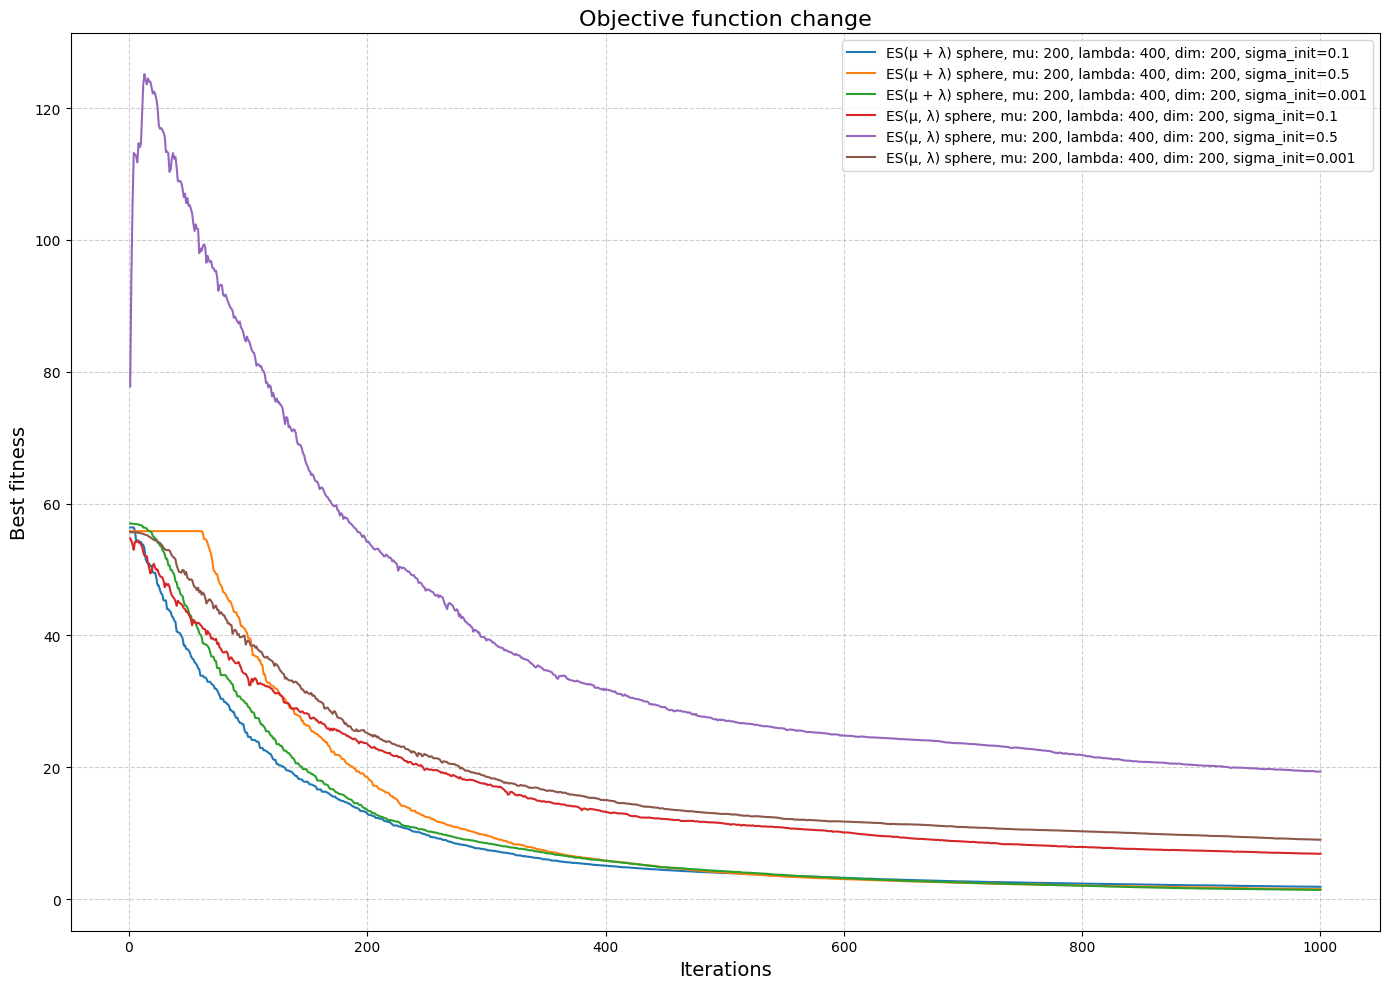

In [64]:
num_generations = 1_000
sigma_init = 0.1
print("Different sigmas")
plot_fitness_history(
    es_mu_plus_lambda_with_sigma(200, 400, num_generations, 200, 0.1, sphere),
    es_mu_plus_lambda_with_sigma(200, 400, num_generations, 200, 0.5, sphere),
    es_mu_plus_lambda_with_sigma(200, 400, num_generations, 200, 0.001, sphere),
    es_mu_comma_lambda_with_sigma(200, 400, num_generations, 200, 0.1, sphere),
    es_mu_comma_lambda_with_sigma(200, 400, num_generations, 200, 0.5, sphere),
    es_mu_comma_lambda_with_sigma(200, 400, num_generations, 200, 0.001, sphere),
)


Different mu and lambdas


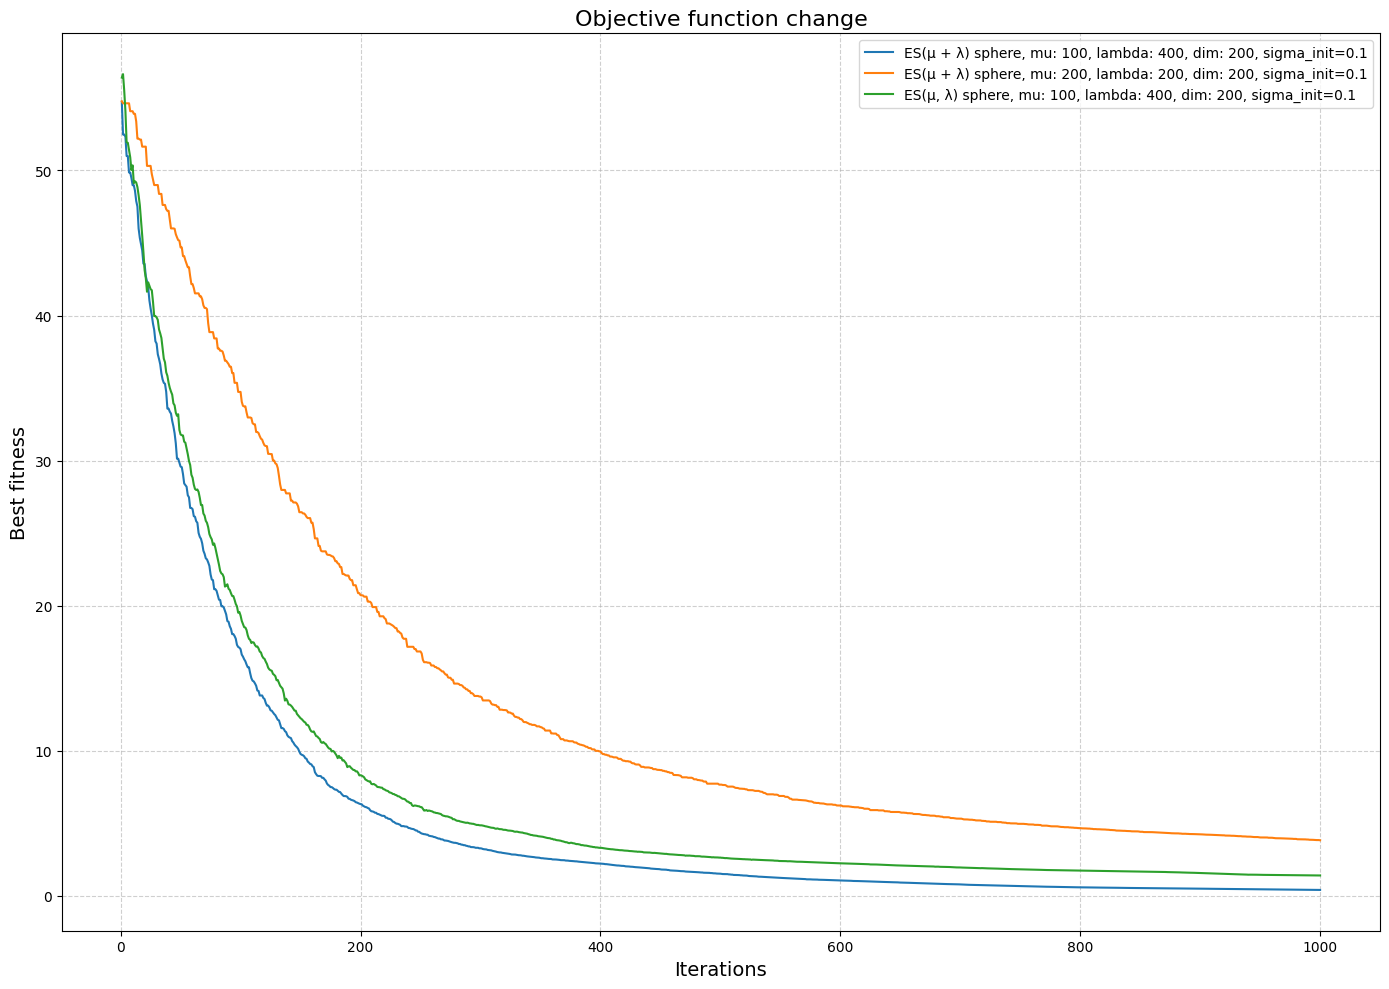

In [65]:
print("Different mu and lambdas")
plot_fitness_history(
    es_mu_plus_lambda_with_sigma(100, 400, num_generations, 200, 0.1, sphere),
    es_mu_plus_lambda_with_sigma(200, 200, num_generations, 200, 0.1, sphere),
    es_mu_comma_lambda_with_sigma(100, 400, num_generations, 200, 0.1, sphere),
)

One interesting case


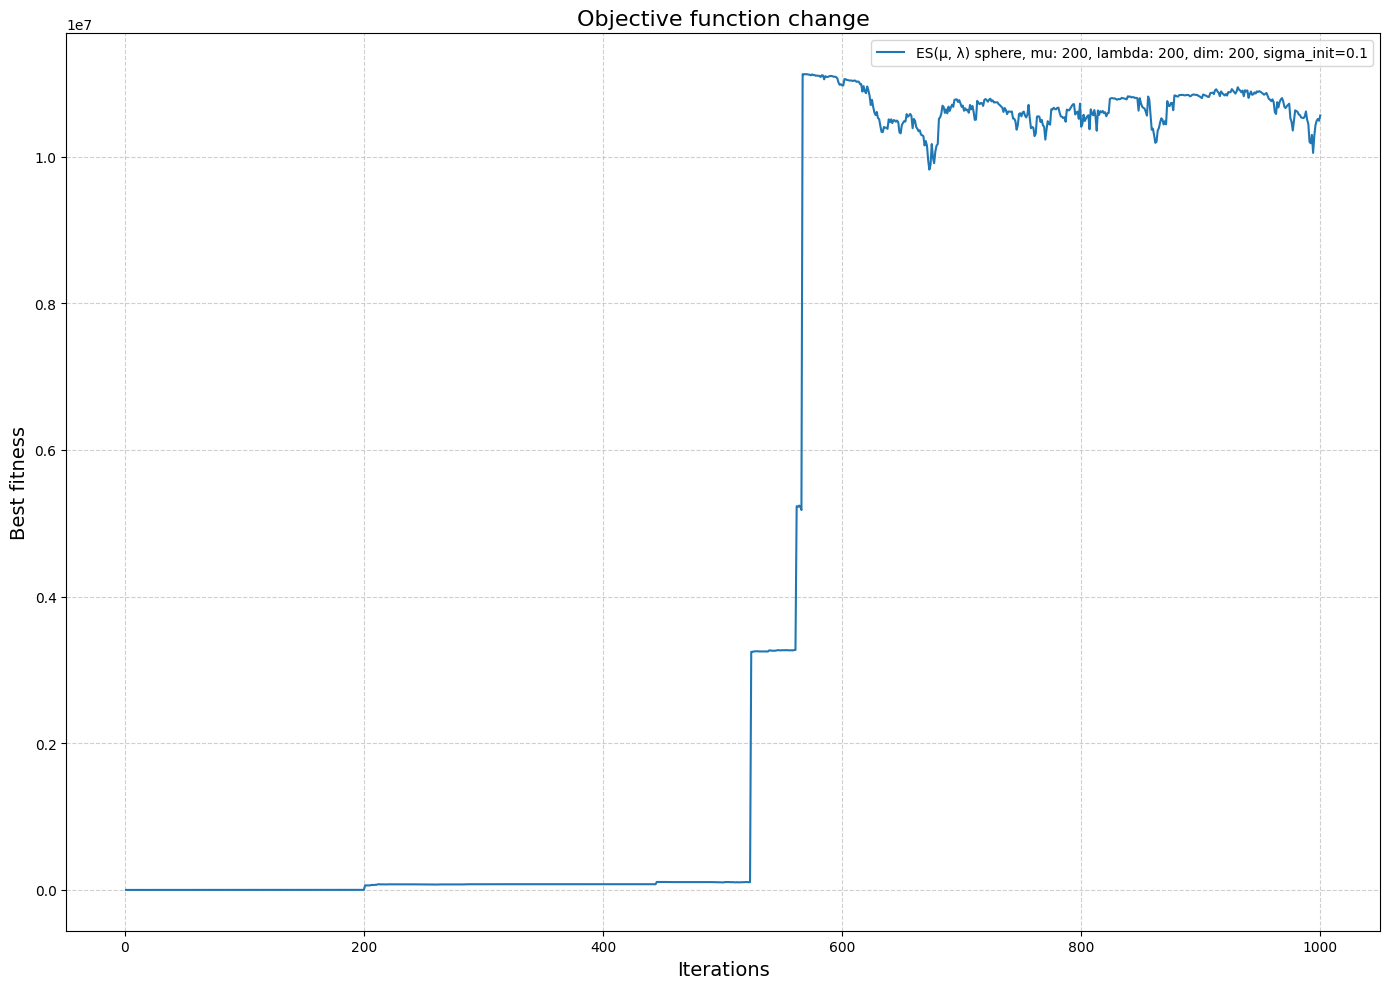

In [66]:
print("One interesting case")
plot_fitness_history(es_mu_comma_lambda_with_sigma(200, 200, num_generations, 200, 0.1, sphere))

Different dimensions


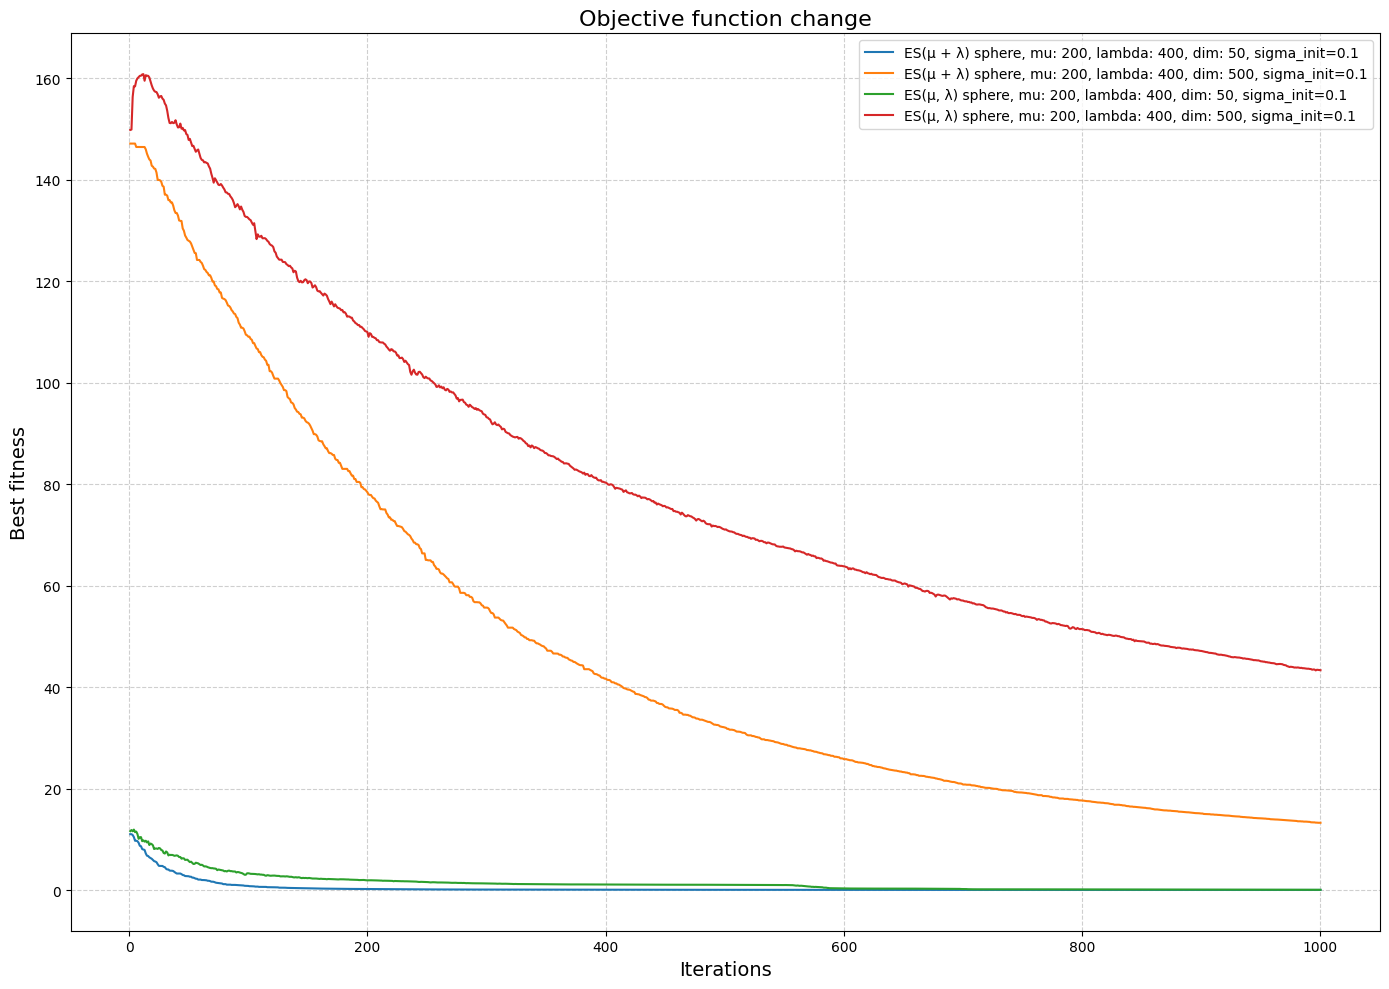

In [67]:
print("Different dimensions")
plot_fitness_history(
    es_mu_plus_lambda_with_sigma(200, 400, num_generations, 50, 0.1, sphere),
    es_mu_plus_lambda_with_sigma(200, 400, num_generations, 500, 0.1, sphere),
    es_mu_comma_lambda_with_sigma(200, 400, num_generations, 50, 0.1, sphere),
    es_mu_comma_lambda_with_sigma(200, 400, num_generations, 500, 0.1, sphere)
)

In [29]:
def rastrigin(x):
    A = 10
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))

def ackley(x, a=20, b=0.2, c=2 * np.pi):
    d = len(x)
    term1 = -a * np.exp(-b * np.sqrt(np.sum(x**2) / d))
    term2 = -np.exp(np.sum(np.cos(c * x)) / d)
    return term1 + term2 + a + np.exp(1)

def griewank(x):
    n = len(x)
    return (
        1
        + np.sum(x**2 / 4000)
        - np.prod(
            np.cos(
                x/np.sqrt(
                    np.arange(1, n + 1)
                )
            )
        )
    )

def powell(x):
    n = len(x)

    if n % 4 != 0:
        raise ValueError("Powell function is defined only for input sizes that are multiples of 4.")
    result = 0
    for i in range(0, n, 4):
        term1 = (x[i] + 10 * x[i + 1])**2
        term2 = 5 * (x[i + 2] - x[i + 3])**2
        term3 = (x[i + 1] - 2 * x[i + 2])**4
        term4 = 10 * (x[i] - x[i + 3])**4
        result += term1 + term2 + term3 + term4
    return result

def schwefel(x):
    n = len(x)
    return 418.9829*n - np.sum(
        x * np.sin(
            np.sqrt(
                np.abs(x)
            )
        )
    )

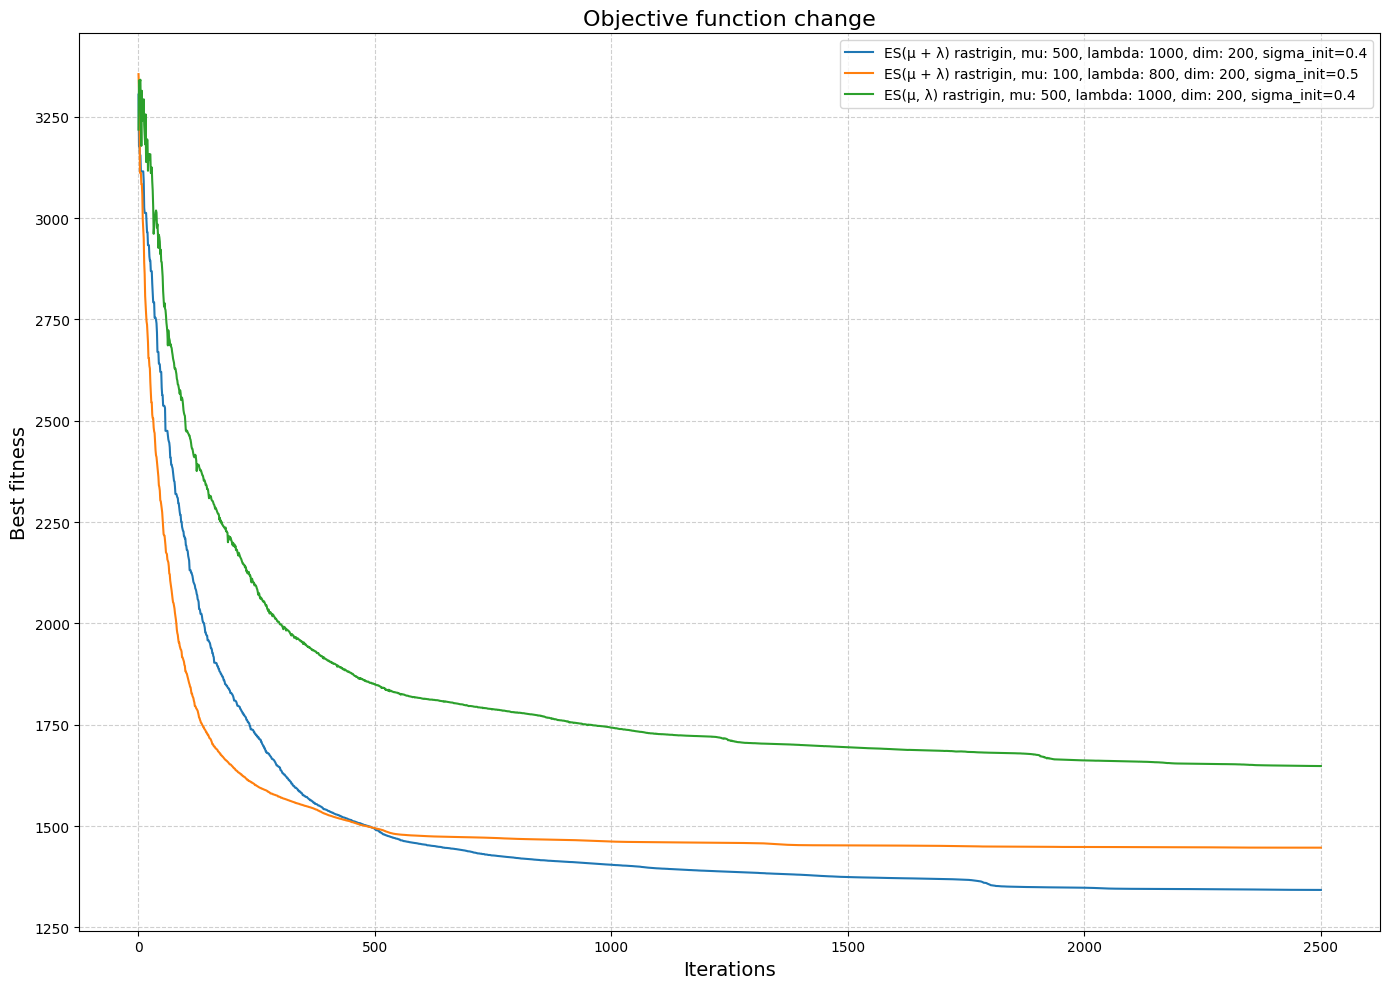

In [ ]:
num_generations = 2_500
sigma_init = 0.4
mu = 500
lambd = 1000
dim = 200
plot_fitness_history(
    es_mu_plus_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, rastrigin, interval=(-5.12, 5.12)),
    es_mu_comma_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, rastrigin, interval=(-5.12, 5.12)),
)

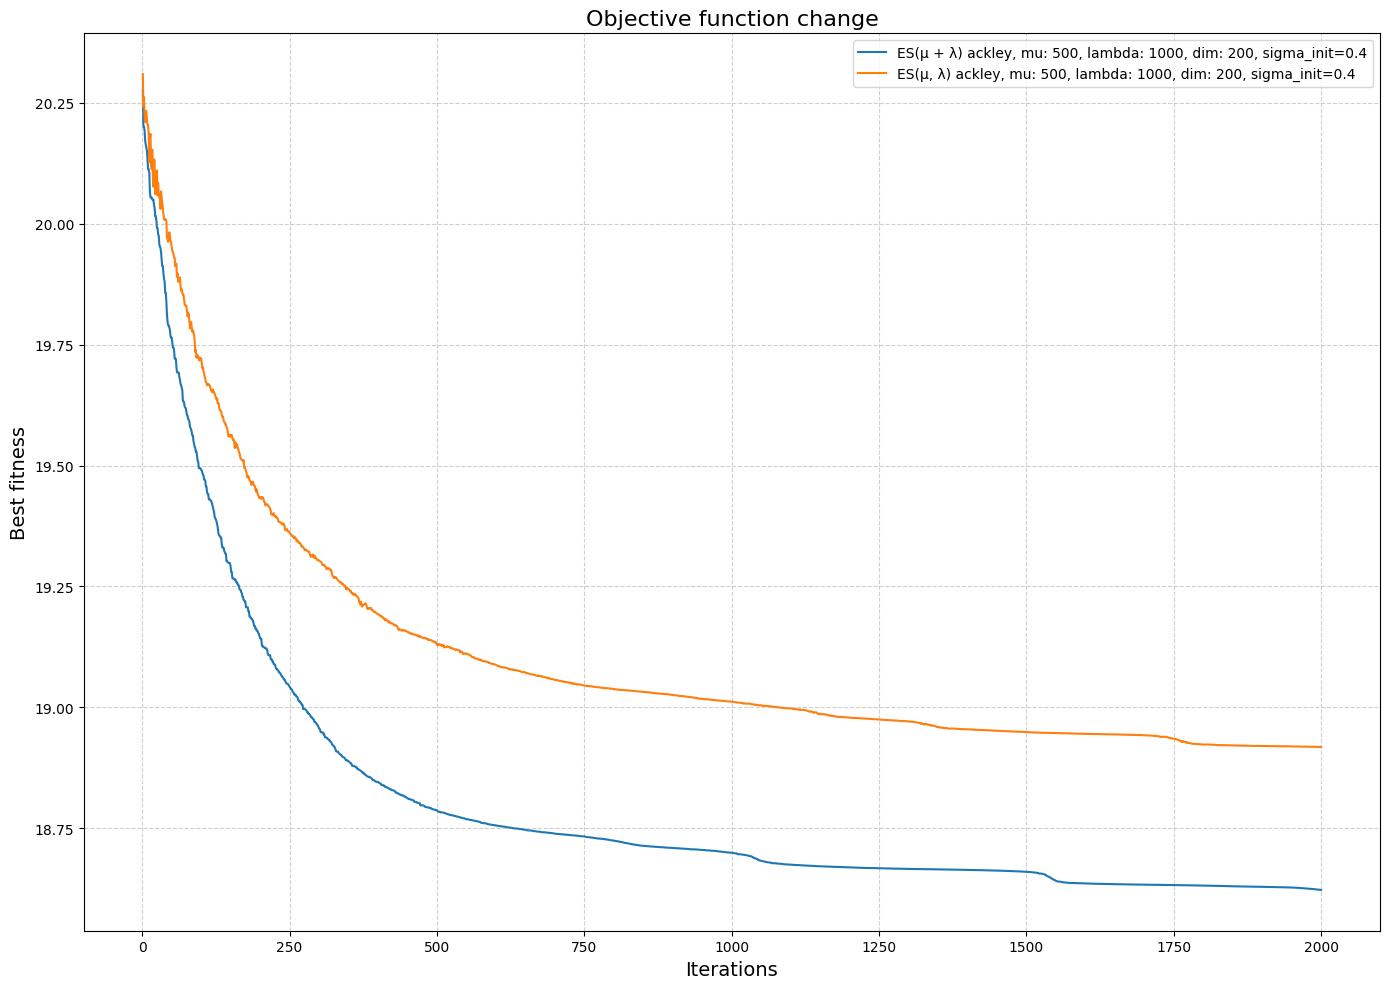

In [84]:
num_generations = 2_000
sigma_init = 0.4
mu = 500
lambd = 1000
dim = 200

plot_fitness_history(
    es_mu_plus_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, ackley, interval=(-15, 30)),
    es_mu_comma_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, ackley, interval=(-15, 30)),
)

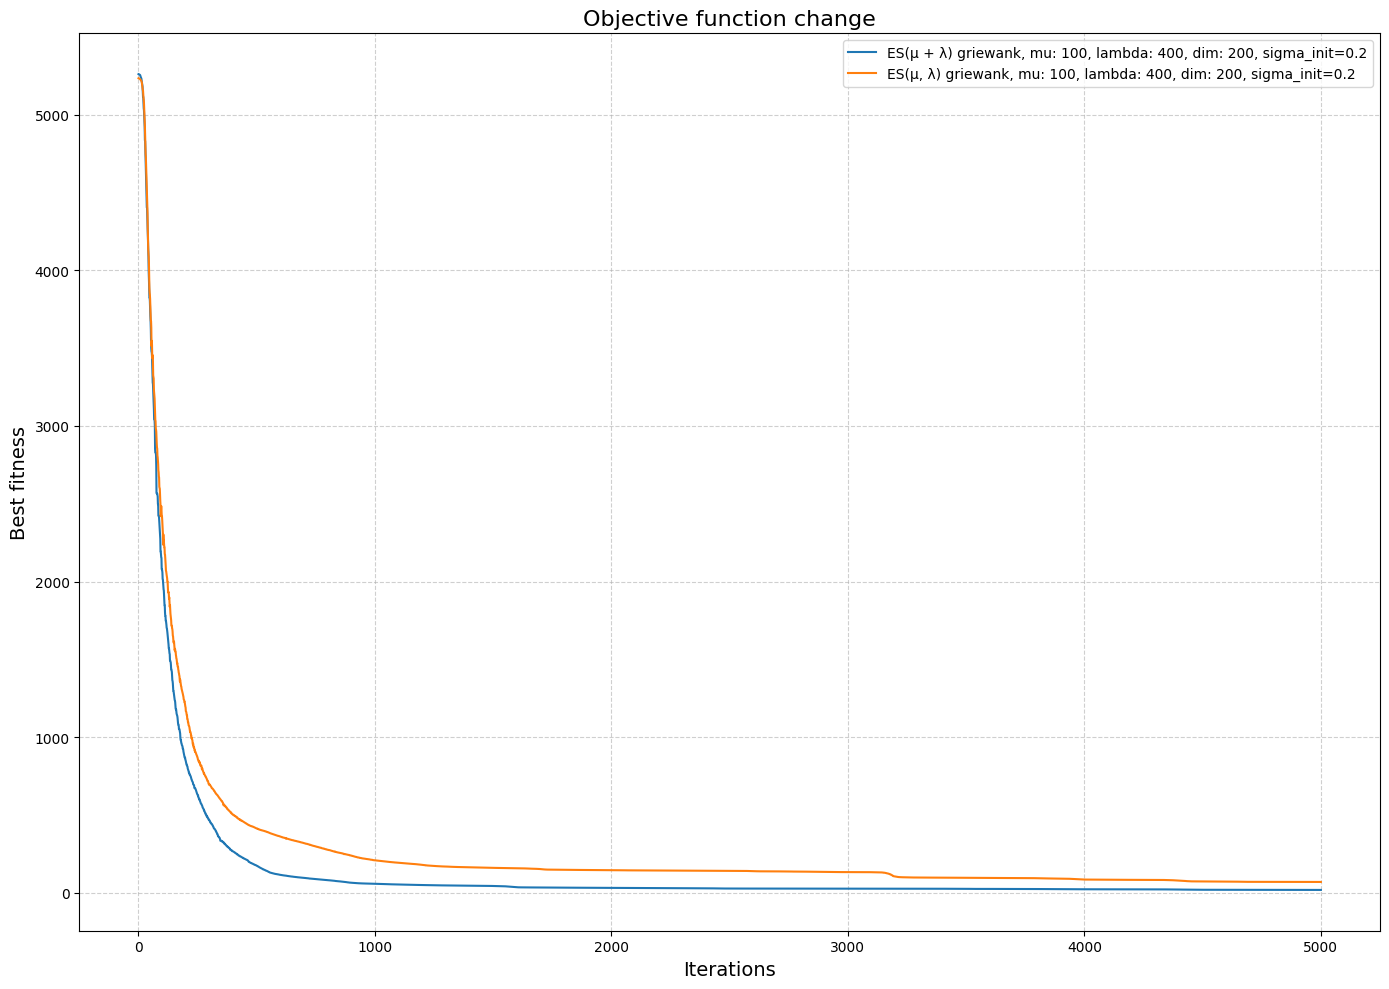

In [71]:
num_generations = 5_000
sigma_init = 0.2
mu = 100
lambd = 400
dim = 200

plot_fitness_history(
    es_mu_plus_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, griewank, interval=(-600, 600)),
    es_mu_comma_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, griewank, interval=(-600, 600)),
)

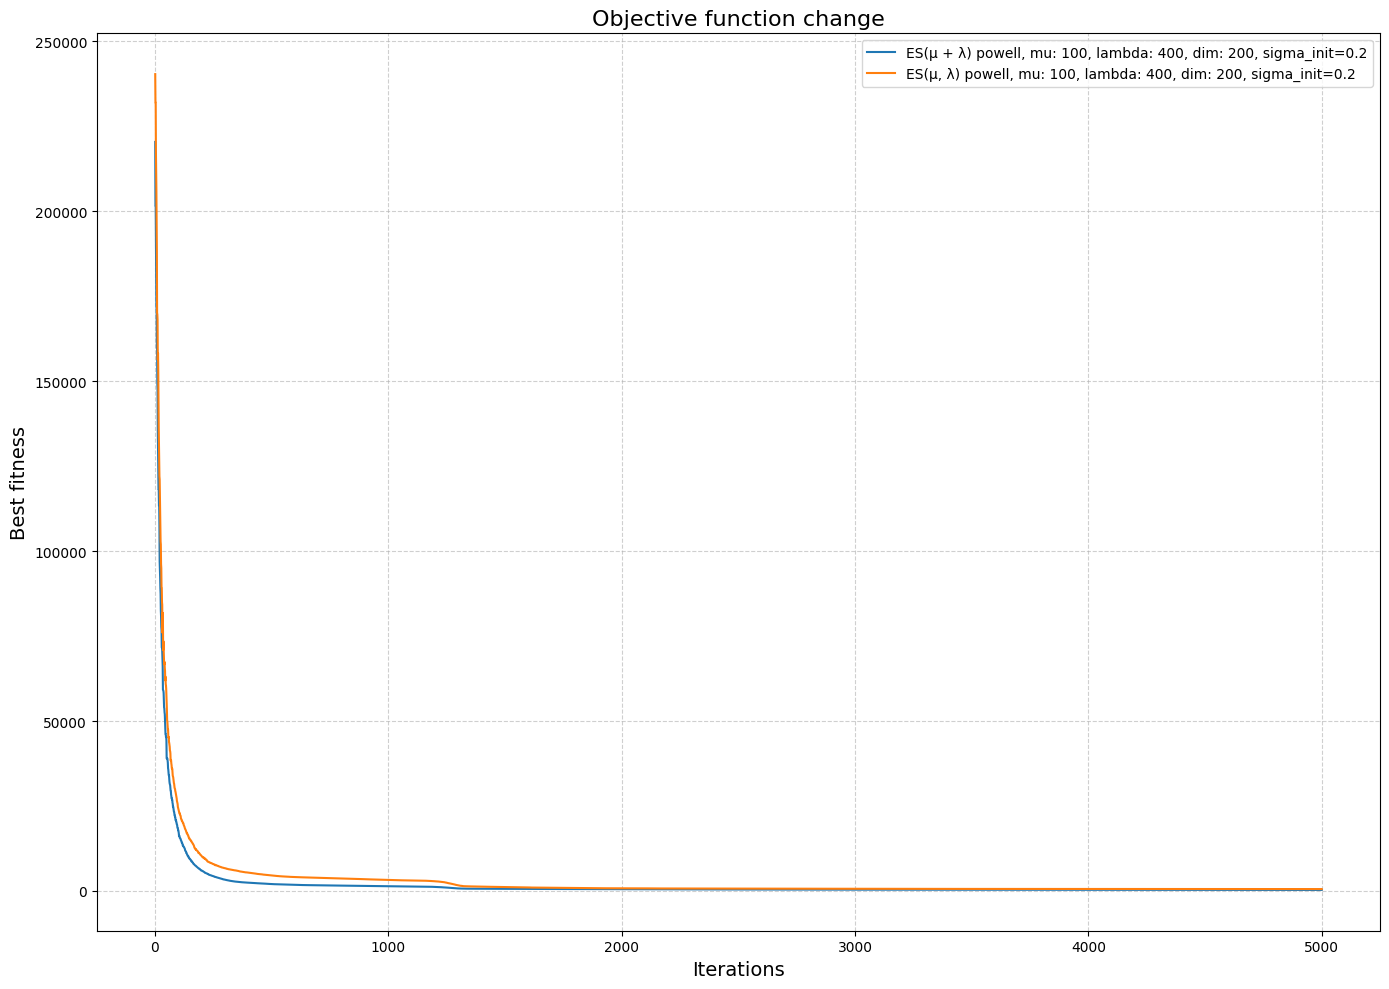

In [72]:
num_generations = 5_000
sigma_init = 0.2
mu = 100
lambd = 400
dim = 200

plot_fitness_history(
    es_mu_plus_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, powell, interval=(-4, 5)),
    es_mu_comma_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, powell, interval=(-4, 5)),
)

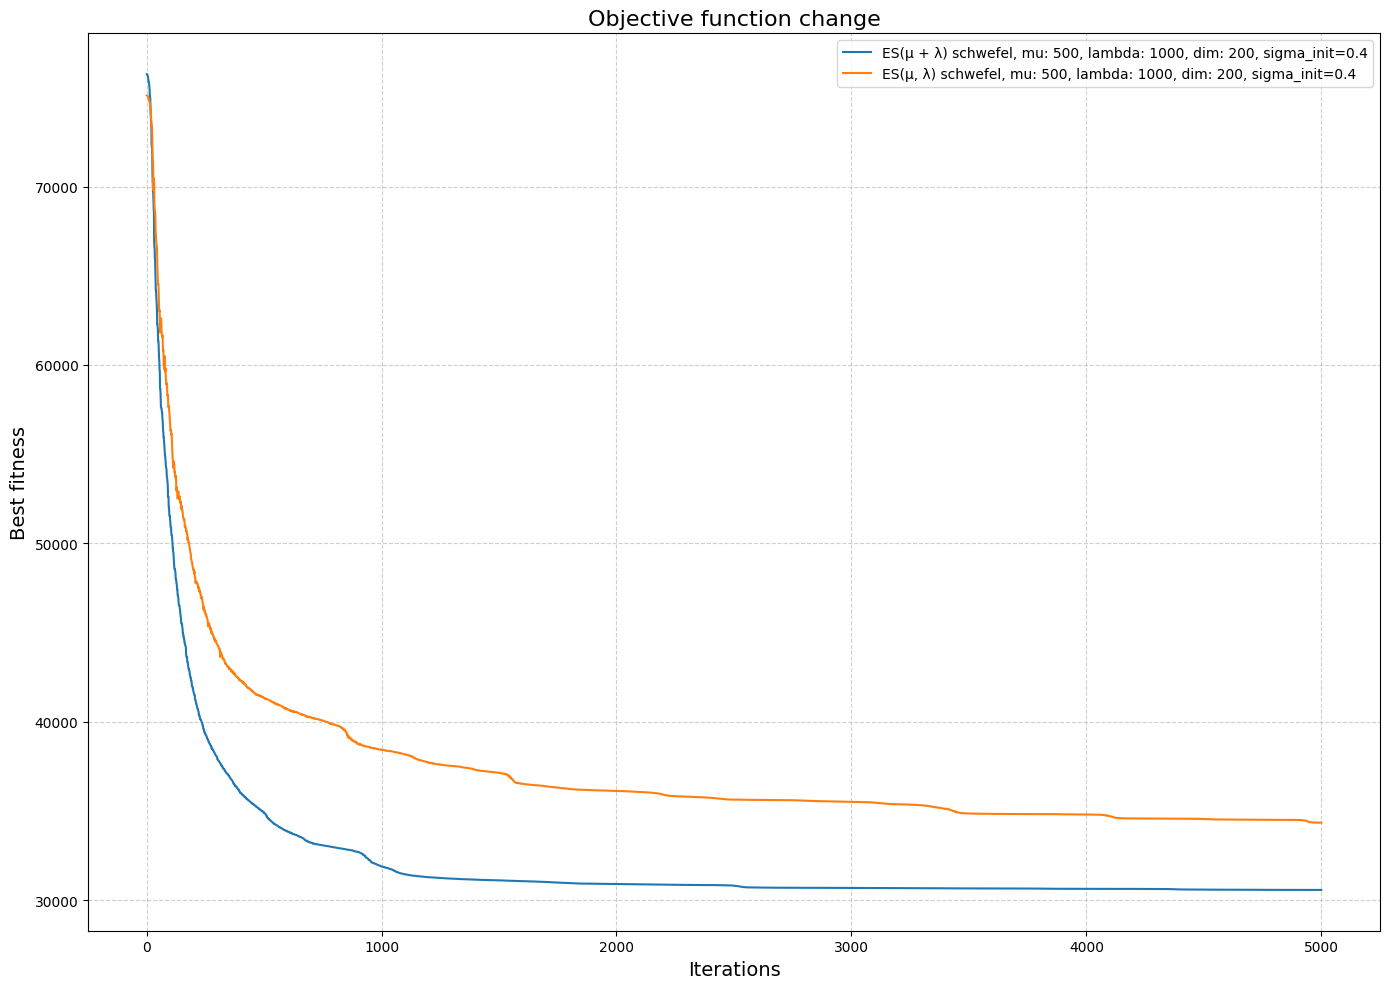

In [86]:
num_generations = 5000
sigma_init = 0.4
mu = 500
lambd = 1000
dim = 200

plot_fitness_history(
    es_mu_plus_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, schwefel, interval=(-500, 500)),
    es_mu_comma_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, schwefel, interval=(-500, 500)),
)

Zadanie 2

In [83]:
def g3(x):
    n = len(x)
    if not all([0<=xi<=1 for xi in x]):
        return np.inf
    if abs(np.sum(x**2)-1) > 1e-2:
        return np.inf
    return -np.sqrt(n)**n * np.prod(x)

def g8(x):
    n = len(x)
    if n != 2:
        raise ValueError("G8 function is defined only for input sizes of length 2")
    if not all([0<=xi<=10 for xi in x]):
        return np.inf
    if x[0]**2 - x[1] + 1 > 0:
        return np.inf
    if 1 - x[0] + (x[1]-4)**2 > 0:
        return np.inf
    return -(np.sin(2*np.pi*x[0])**3 * np.sin(2*np.pi*x[1]))/(x[0]**3 * (x[0]+x[1]))

def g9(x):
    v1 = 2 * x[0]**2
    v2 = x[1]**2

    y = np.zeros(4)

    y[0] = v1 + 3 * v2**2 + x[2] + 4 * x[3]**2 + 5 * x[4] - 127
    if y[0] > 0:
        return np.inf

    y[1] = 7 * x[0] + 3 * x[1] + 10 * x[2]**2 + x[3] - x[4] - 282
    if y[1] > 0:
        return np.inf

    y[2] = 23 * x[0] + v2 + 6 * x[5]**2 - 8 * x[6] - 196
    if y[2] > 0:
        return np.inf

    y[3] = 2 * v1 + v2 - 3 * x[0] * x[1] + 2 * x[2]**2 + 5 * x[5] - 11 * x[6]
    if y[3] > 0:
        return np.inf

    if not all([-10.0<=xi<=10.0 for xi in x]):
        return np.inf
    return (x[0] - 10)**2 + 5 * (x[1] - 12)**2 + x[2]**4 + 3 * (x[3] - 11)**2 + 10 * x[4]**6 + 7 * x[5]**2 + x[6]**4 - 4 * x[5] * x[6] - 10 * x[5] - 8 * x[6]

def g11(x):
    n = len(x)
    if n != 2:
        raise ValueError("G11 function is defined only for input sizes of length 2")

    if np.abs(x[1] - x[0]**2) > 1e-4:
        return np.inf  # Jeśli ograniczenie jest naruszone, zwróć inf
    
    return x[0]**2 + (x[1] - 1)**2

def g12(x):
    n = len(x)
    if n != 3:
        raise ValueError("G12 function is defined only for input sizes of length 3")

    if not all([0.0<=xi<=10.0 for xi in x]):
        return np.inf
    
    z = np.zeros((9, 9, 9))  # Tworzymy macierz 3D
    Z1 = np.zeros((9, 9))     # Tworzymy macierz Z1
    Z2 = np.zeros(9)          # Tworzymy wektor Z2
    
    for p in range(9):
        for q in range(9):
            for r in range(9):
                z[p, q, r] = (x[0] - (p + 1))**2 + (x[1] - (q + 1))**2 + (x[2] - (r + 1))**2 - 0.0625
    
    for p in range(9):
        for q in range(9):
            Z1[p, q] = np.min(z[p, q, :])
    
    for p in range(9):
        Z2[p] = np.min(Z1[p, :])
    
    if np.min(Z2) > 0:
        return np.inf
    
    return 1 - 0.01 * ((x[0] - 5)**2 + (x[1] - 5)**2 + (x[2] - 5)**2)

[0.49091716 0.49841238 0.51565759 0.50466096] -1.0187746903746095
[0.46593569 0.45298687 0.53868704 0.54545679] -0.9922667675849735


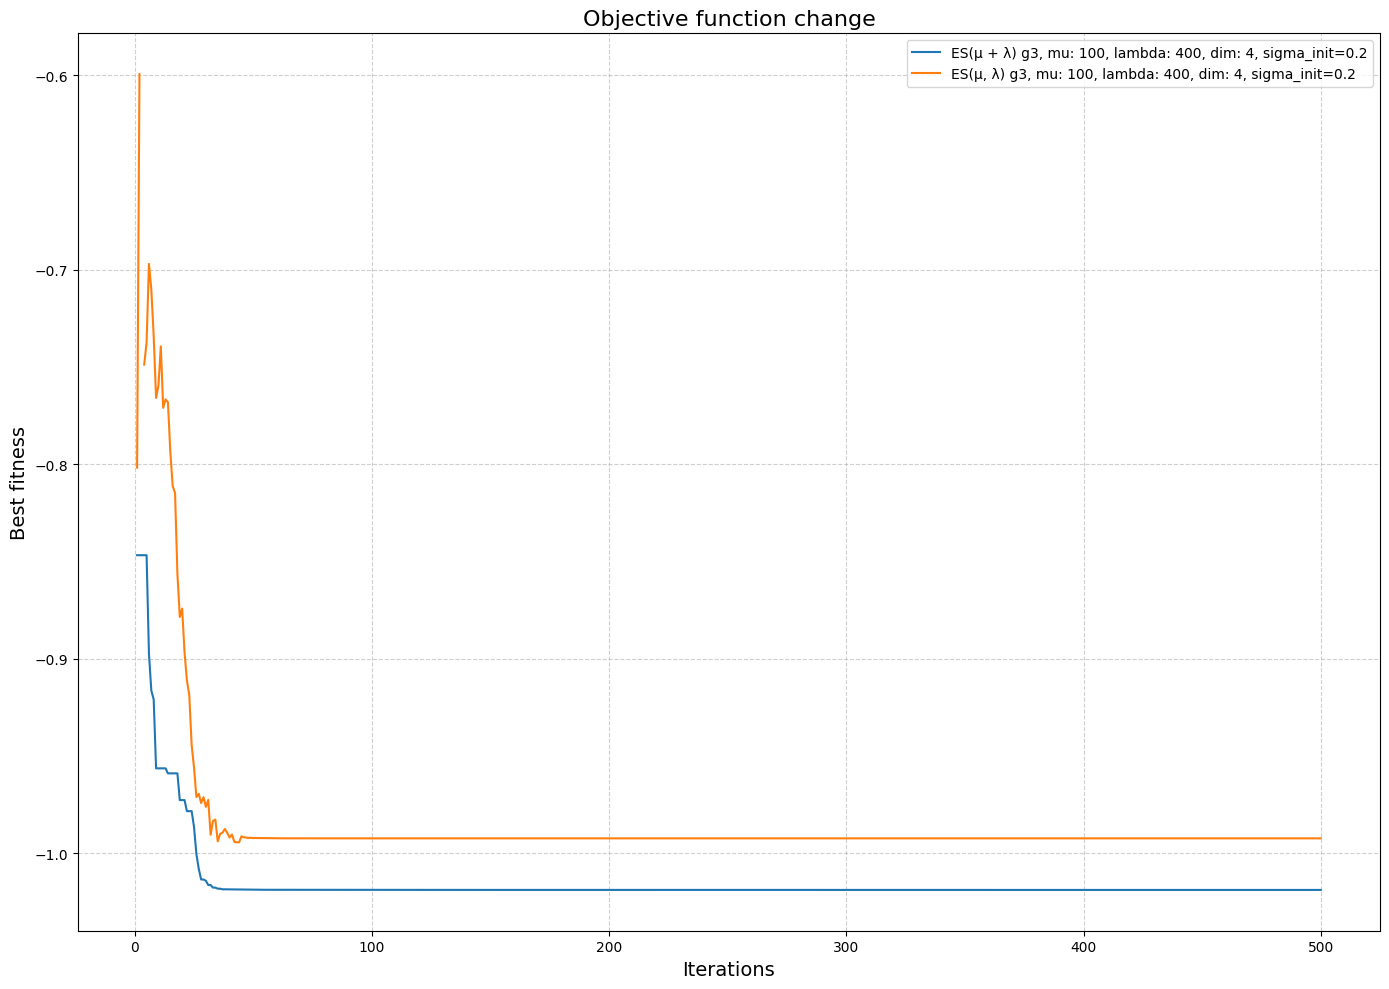

In [82]:
num_generations = 500
sigma_init = 0.2
mu = 100
lambd = 400
dim = 4

plot_fitness_history(
    es_mu_plus_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, g3, interval=(0.0, 1.001)),
    es_mu_comma_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, g3, interval=(0.0, 1.001)),
)

The global minima: x* =  (1/n0.5, …, 1/n0.5), f(x*) = 1. (Remember that g3 calculates max, in our function we minimize function so that's why negative number). Sadly only for dimension 4 and smaller I get good results, 5 gets -1.2, above gets infinities

[1.22797135 4.24537337]


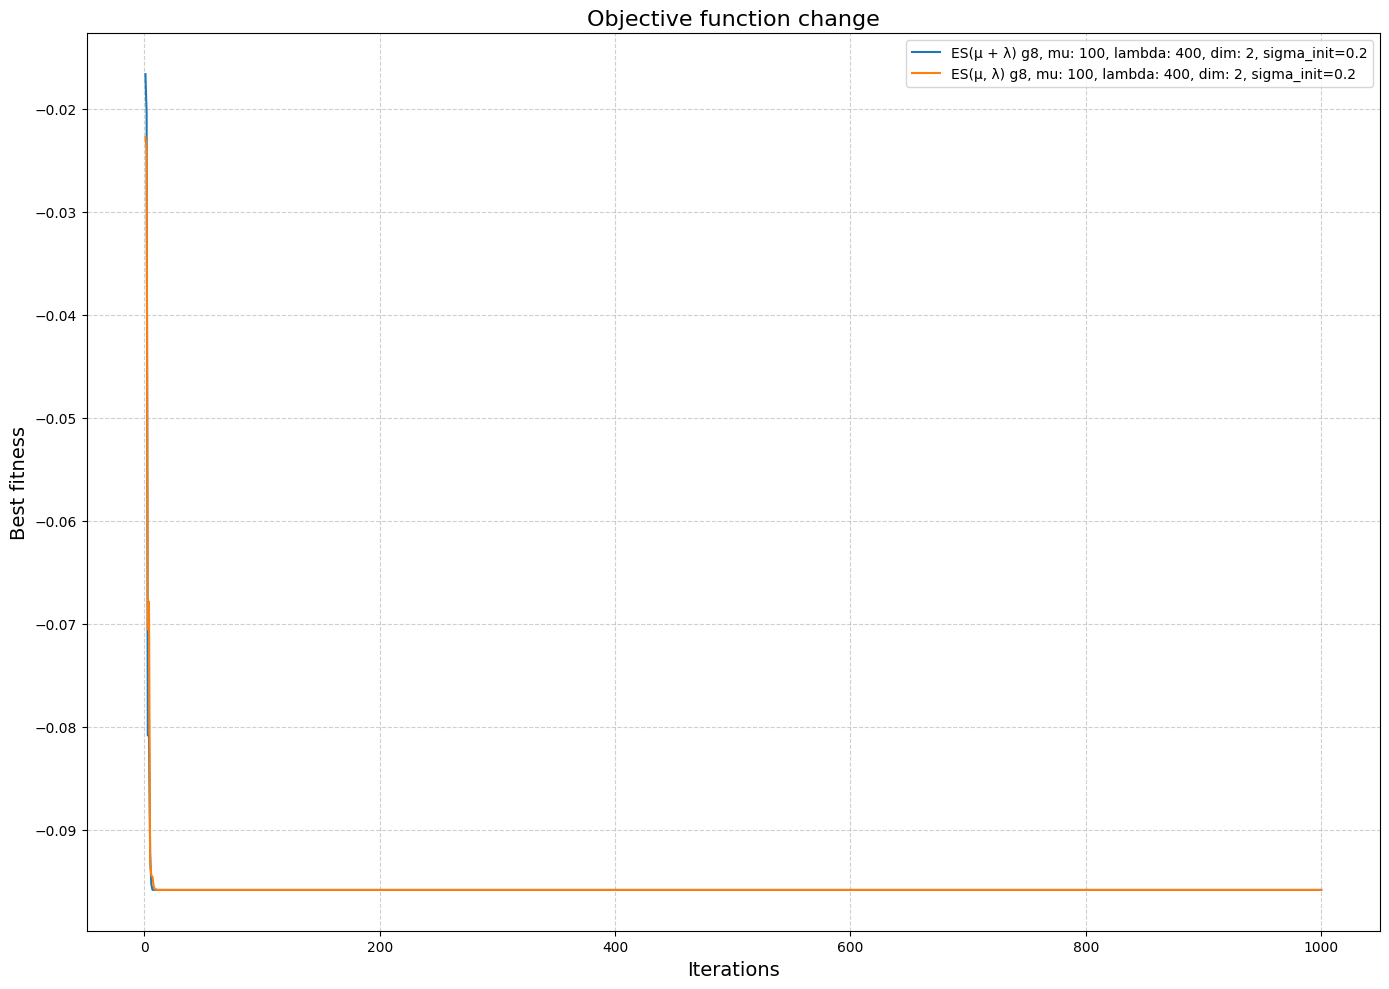

In [38]:
num_generations = 1000
sigma_init = 0.2
mu = 100
lambd = 400
dim = 2

plot_fitness_history(
    es_mu_plus_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, g8, interval=(0.0, 10.0)),
    es_mu_comma_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, g8, interval=(0.0, 10.0)),
)

^^ exactly same as on the site (The global minima: x∗ = (1.2279713, 4.2453733) , f (x∗) = 0.095825.) note that the function calculates `max`, my code calculates min so I just make it negative


[ 2.3174864   1.91990658 -0.24900709  4.44034938 -0.62399817  0.86714131
  1.48005978] 681.1602524578926
[ 2.18724954  1.86212673 -0.74787896  4.61878759 -0.64480757  1.09580647
  1.54387535] 682.1232914276221


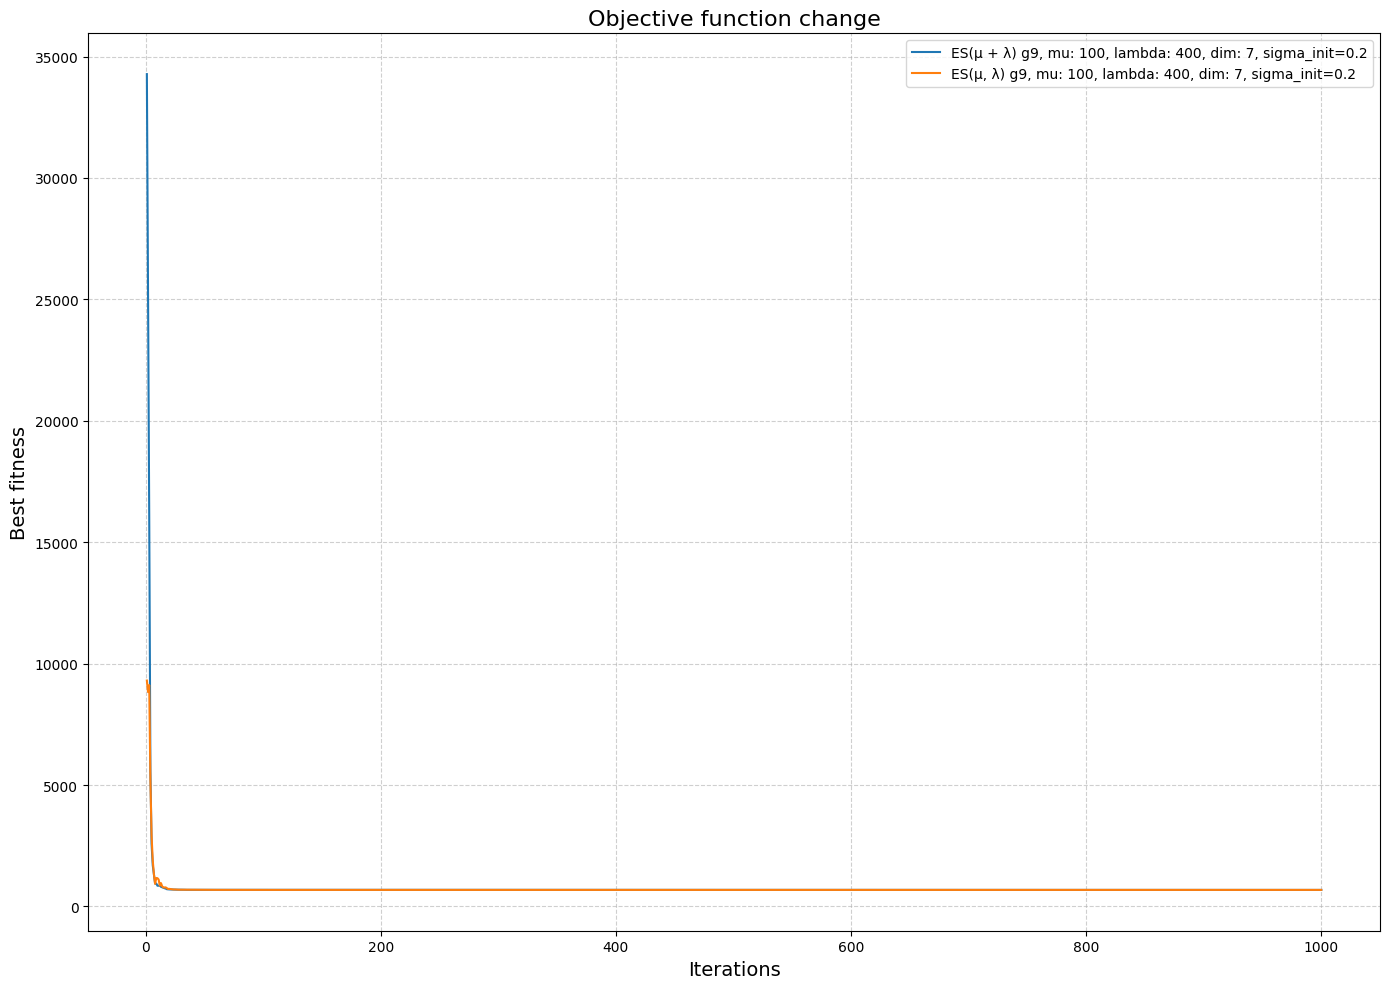

In [45]:
num_generations = 1000
sigma_init = 0.2
mu = 100
lambd = 400
dim = 7

plot_fitness_history(
    es_mu_plus_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, g9, interval=(-10.0, 10.0)),
    es_mu_comma_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, g9, interval=(-10.0, 10.0)),
)

Also very close to the optimum: The global minima: x∗ = (2.330499, 1.951372,−0.4775414, 4.365726,−0.6244870, 1.038131,1.594227), f (x∗) = 680.6300573.

[-0.70130655  0.49193088] 0.7499651106969412
[ 2.06247664e+09 -9.03996955e+07] inf


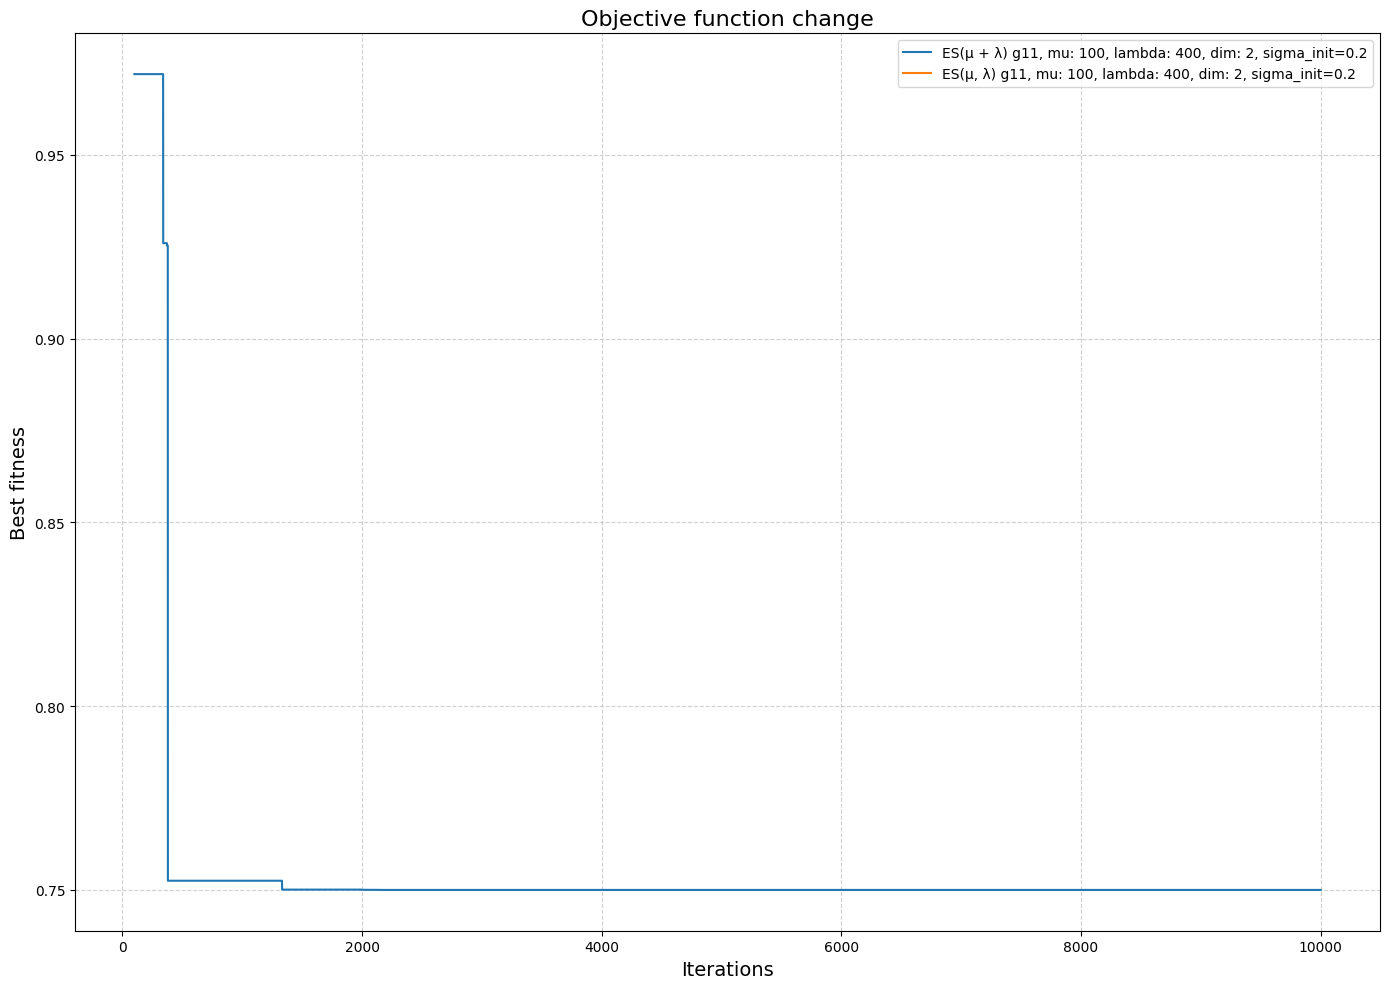

In [60]:
num_generations = 10000
sigma_init = 0.2
mu = 100
lambd = 400
dim = 2

plot_fitness_history(
    es_mu_plus_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, g11, interval=(-1.0, 1.0)),
    es_mu_comma_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, g11, interval=(-1.0, 1.0)),
)

The global minima: x* =  ±(1/20.5, 1/2), f(x*) = 0.75.
Couldn't make the comma version work, I can't figure out why

[9.15185643 0.84158375 8.11976609] 0.5573672201843014
[0.85714058 9.14285946 9.14724931] 0.48473754438675987


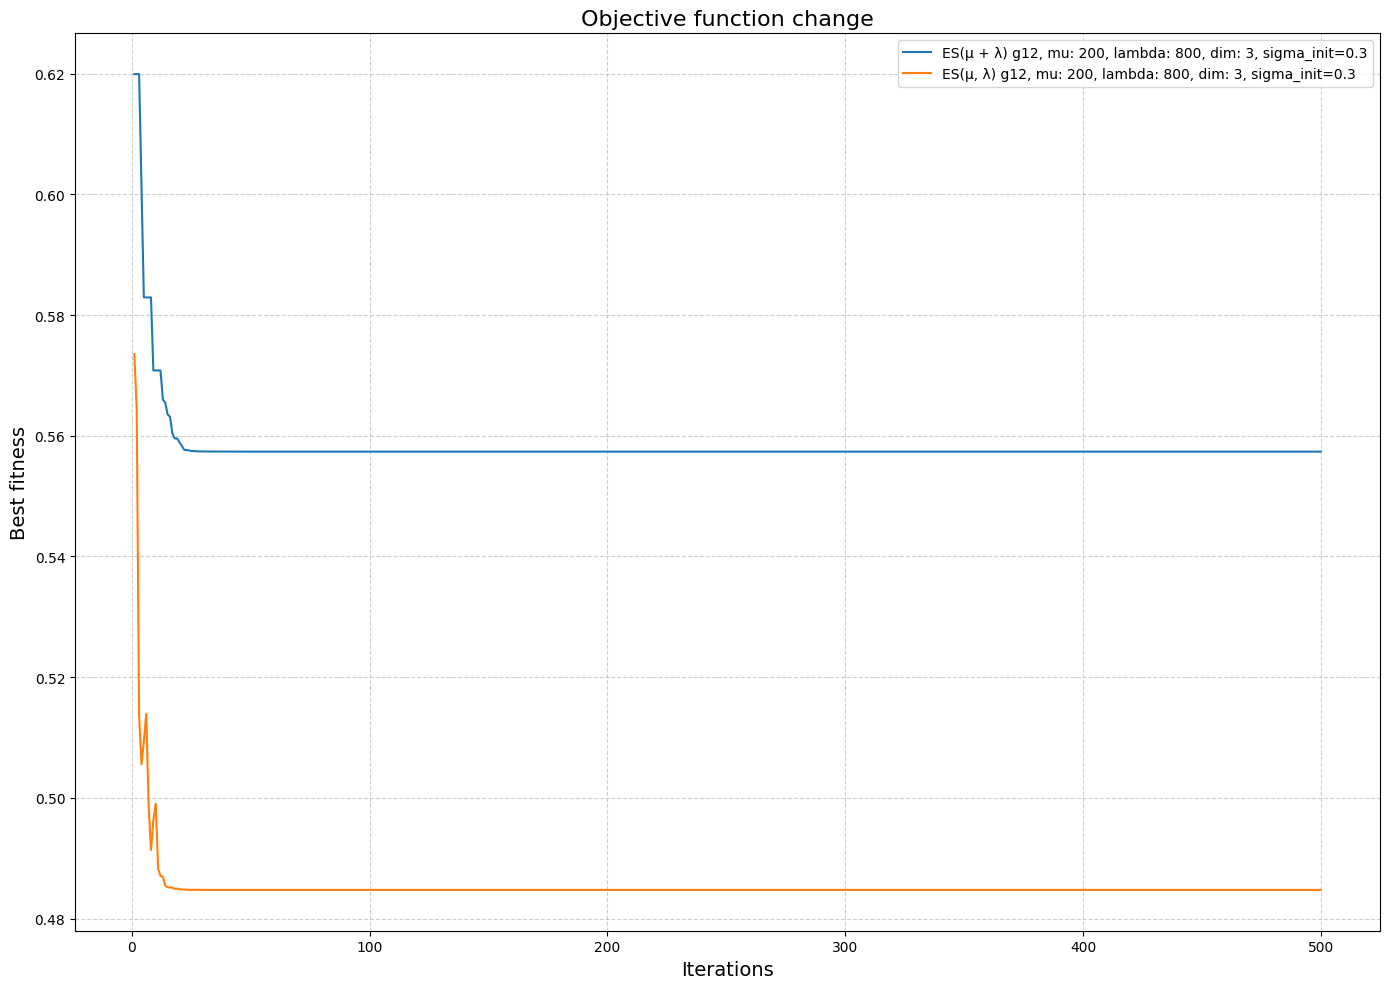

In [86]:
num_generations = 500
sigma_init = 0.3
mu = 200
lambd = 800
dim = 3

plot_fitness_history(
    es_mu_plus_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, g12, interval=(0.0, 10.001)),
    es_mu_comma_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, g12, interval=(0.0, 10.001)),
)

 The global minima: x* =  (5, 5, 5), f(x*) = 1



Zadanie 3

In [27]:
def generate_modified_benchmark(F, d, h):
    A = np.random.randn(d, h) 
    b = np.random.randn(d)

    def G(y):
        if len(y) != h:
            raise ValueError(f"Input dimension must be {h}, got {len(y)}.")

        transformed = np.dot(A, y) + b

        return F(transformed)

    return G

0.05406909032577811
0.05167651568178244
10.633708282295876
32.10129303639291


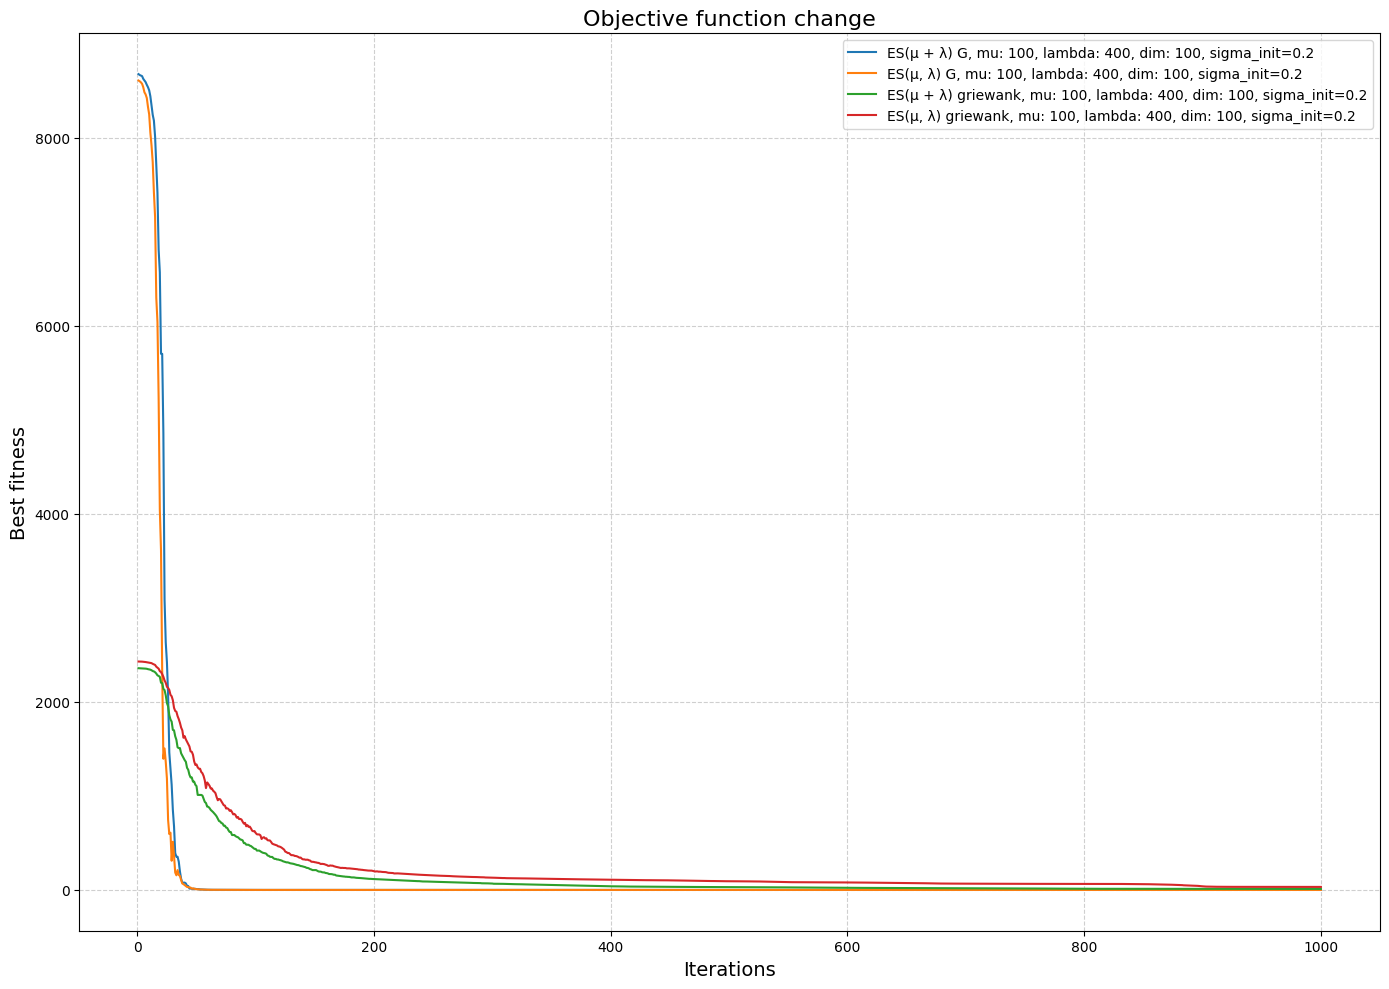

In [20]:
d = 10
h = 10 * d

num_generations = 1_000
sigma_init = 0.2
mu = 100
lambd = 400
dim = h

plot_fitness_history(
    es_mu_plus_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, generate_modified_benchmark(griewank, d, h), interval=(-600, 600)),
    es_mu_comma_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, generate_modified_benchmark(griewank, d, h), interval=(-600, 600)),
    es_mu_plus_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, griewank, interval=(-600, 600)),
    es_mu_comma_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, griewank, interval=(-600, 600)),
)

0.0004850002905868716
0.0039011316043316858
246.32489570364152
366.4390712994133


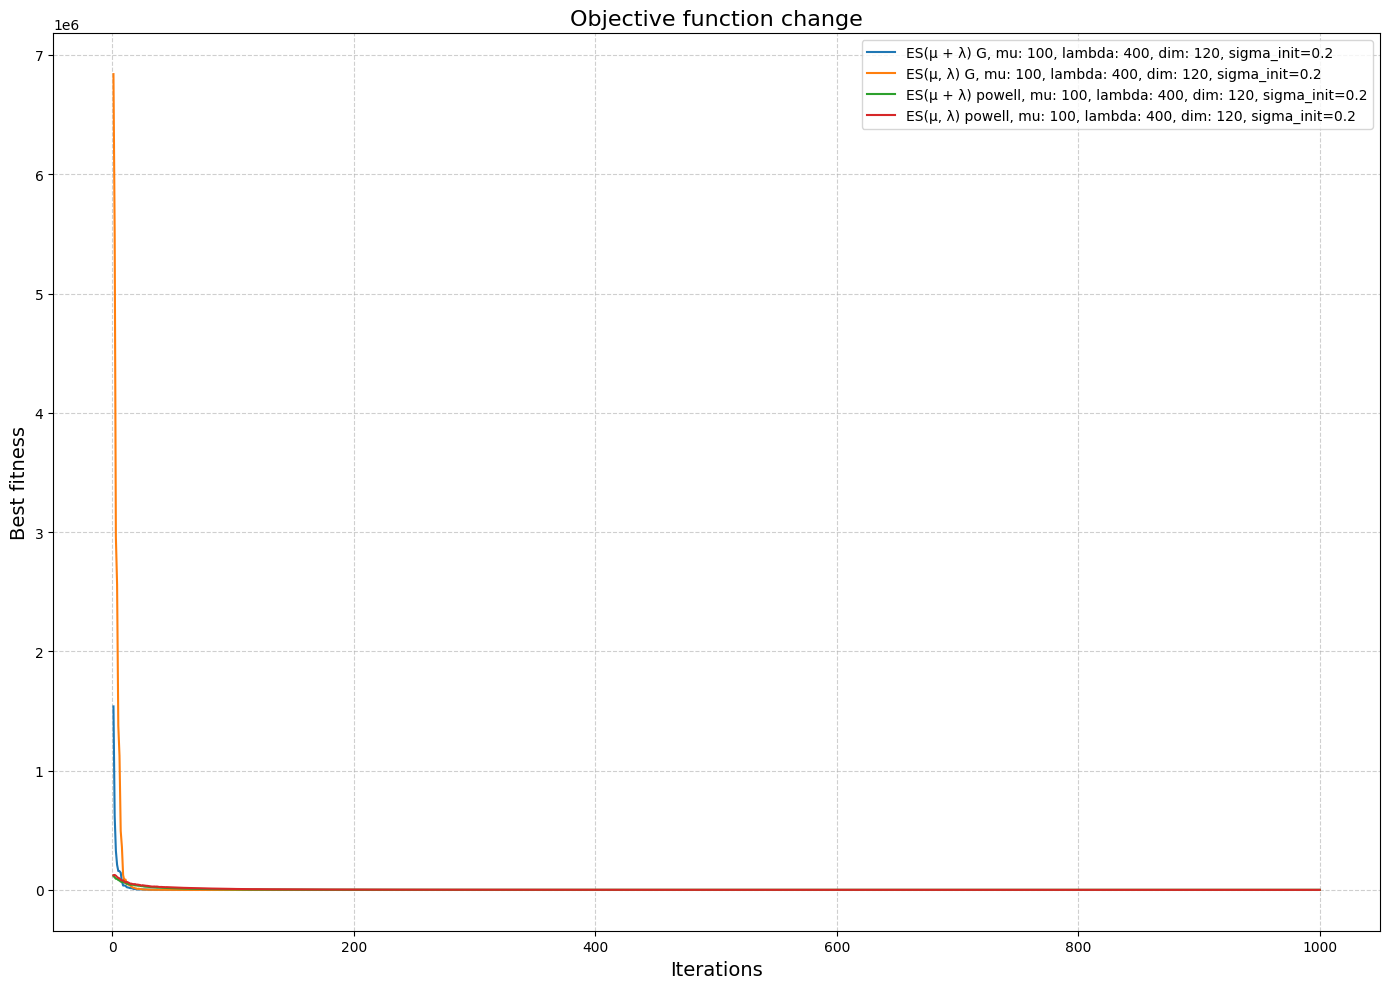

In [30]:
d = 12
h = 10 * d

num_generations = 1_000
sigma_init = 0.2
mu = 100
lambd = 400
dim = h

plot_fitness_history(
    es_mu_plus_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, generate_modified_benchmark(powell, d, h), interval=(-4, 5)),
    es_mu_comma_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, generate_modified_benchmark(powell, d, h), interval=(-4, 5)),
    es_mu_plus_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, powell, interval=(-4, 5)),
    es_mu_comma_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, powell, interval=(-4, 5)),
)

23.878971984429143
16.91428381930963
618.1186616712602
749.6394277804743


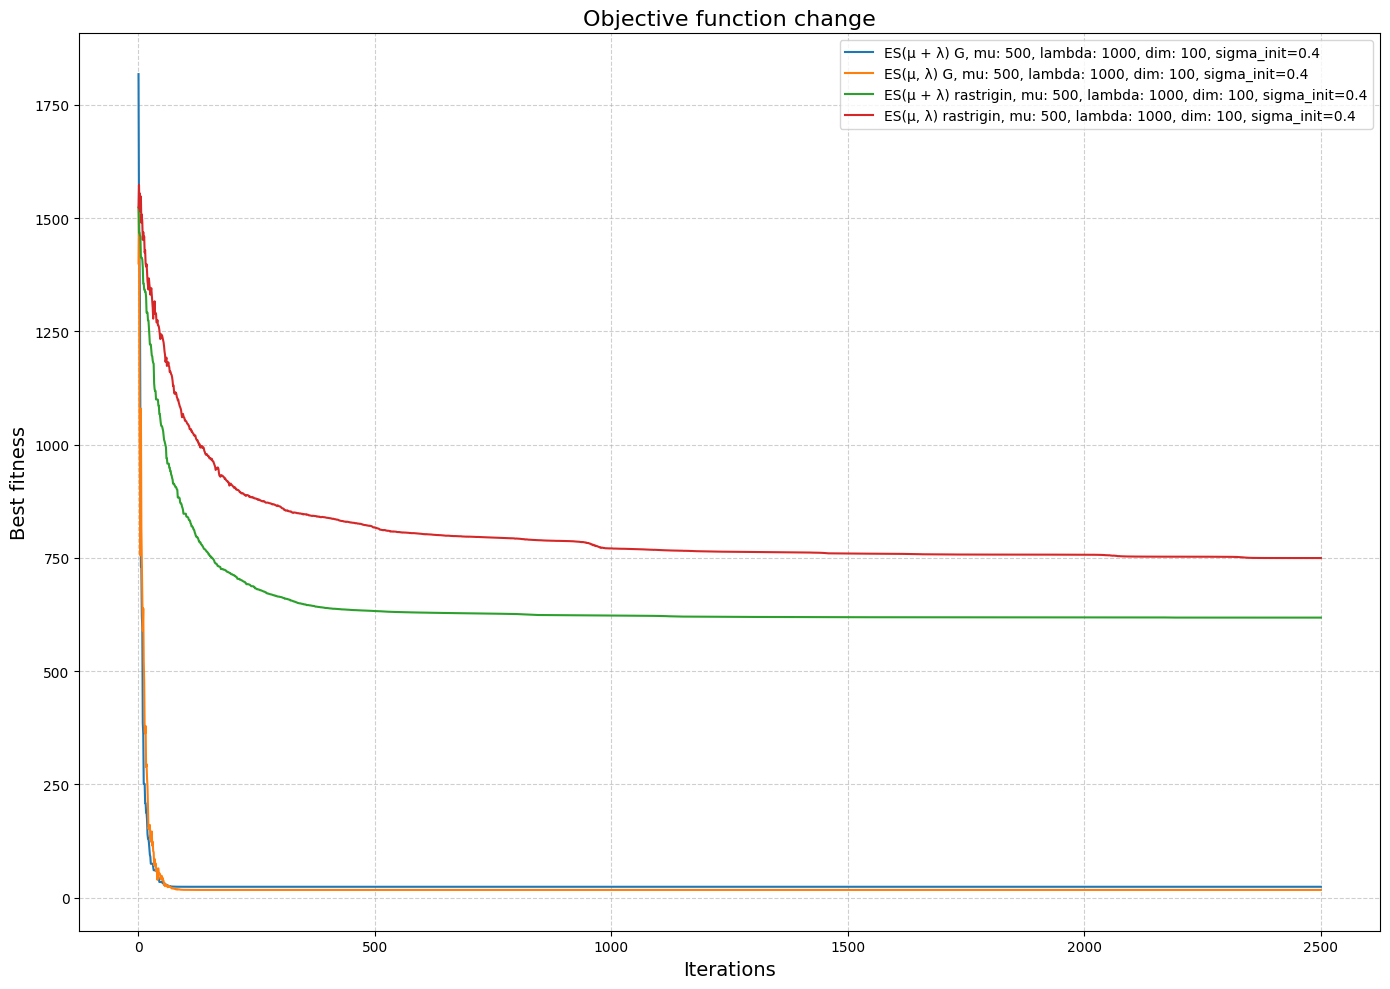

In [31]:
d = 10
h = 10 * d

num_generations = 2_500
sigma_init = 0.4
mu = 500
lambd = 1000
dim = h
plot_fitness_history(
    es_mu_plus_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, generate_modified_benchmark(rastrigin, d, h), interval=(-5.12, 5.12)),
    es_mu_comma_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, generate_modified_benchmark(rastrigin, d, h), interval=(-5.12, 5.12)),
    es_mu_plus_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, rastrigin, interval=(-5.12, 5.12)),
    es_mu_comma_lambda_with_sigma(mu, lambd, num_generations, dim, sigma_init, rastrigin, interval=(-5.12, 5.12)),
)